In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import shutil


In [9]:
data_dir = './drive/MyDrive/deep_learn/project/dataset' # change to your directory
class_names_bin = ['African', 'Asian']

# Define paths
test_data_dir = data_dir + r'/test'
train_data_dir = data_dir + r'/train'
validation_data_dir = data_dir + '/validation'

In [10]:
# Split the training data into training and validation sets
# Check if the directories exist
if os.path.exists(validation_data_dir):
    print("Validation directory is already exist. Pass to the next step.")
else:
    # check the train-test split ratio
    test_files = 0
    train_files = 0
    total_files = 0
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(test_data_dir, class_name)
        test_files += len(os.listdir(class_dir))
        class_dir = os.path.join(train_data_dir, class_name)
        train_files += len(os.listdir(class_dir))
    total_files = test_files + train_files

    # Set splitting rates
    validation_split_in_total = 0.1
    train_split_in_total = train_files / total_files
    validation_split_in_train = validation_split_in_total / train_split_in_total

    # Iterate over the classes (African and Asian)
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)

        # Ensure it's a directory
        if os.path.isdir(class_dir):
            # List all files in the class directory
            files = os.listdir(class_dir)
            class_files = len(files)
            percentage_class = class_files / train_files
            validation_split_in_train_class = validation_split_in_train

            # Shuffle the files randomly
            random.shuffle(files)

            # Calculate the number of validation samples
            num_validation_samples = int(len(files) * validation_split_in_train_class)

            # Split the files into training and validation sets
            validation_files = files[:num_validation_samples]
            training_files = files[num_validation_samples:]

            # Create destination directories if they don't exist
            os.makedirs(os.path.join(validation_data_dir, class_name), exist_ok=True)

            # Move validation files to validation directory
            for file_name in validation_files:
                src = os.path.join(class_dir, file_name)
                dst = os.path.join(validation_data_dir, class_name, file_name)
                shutil.move(src, dst)

Validation directory is already exist. Pass to the next step.


In [11]:
# Print data distribution
# count the number of files in all the subsets
total_files = 0
# count the number of files in each subset using a dictionary
subset_files = {}
for subset in os.listdir(data_dir):
    for class_path in class_names_bin:
        lst = os.listdir(os.path.join(data_dir, subset, class_path))
        no_files = len(lst)
        txt = "The {subset} set contains {no_files} images of {class_path} elephants."
        print(txt.format(subset=subset, no_files=no_files, class_path=class_path))
    subset_files[subset] = int(len(os.listdir(os.path.join(data_dir, subset, class_names_bin[0])))) + int(len(os.listdir(os.path.join(data_dir, subset, class_names_bin[1]))))
    total_files += subset_files[subset]

# print the total number of files
print("\nThe total number of images in the dataset is", total_files)
# print the number of files in each subset as a percentage of the total number of files
print("The train set contains %.2f%% of the images." % (100*subset_files["train"]/total_files))
print("The test set contains %.2f%% of the images." % (100*subset_files["test"]/total_files))
print("The validation set contains %.2f%% of the images." % (100*subset_files["validation"]/total_files))

The test set contains 97 images of African elephants.
The test set contains 91 images of Asian elephants.
The validation set contains 51 images of African elephants.
The validation set contains 51 images of Asian elephants.
The train set contains 420 images of African elephants.
The train set contains 420 images of Asian elephants.

The total number of images in the dataset is 1130
The train set contains 74.34% of the images.
The test set contains 16.64% of the images.
The validation set contains 9.03% of the images.


In [12]:
dir_dict = {train_data_dir: "Training", validation_data_dir: "Validating", test_data_dir: "Testing"}

data = []

for type_dir, type_label in dir_dict.items():
    for class_name in class_names_bin:
        target_folder = os.path.join(type_dir, class_name)
        for image_file in os.listdir(target_folder):
            img_path = os.path.join(target_folder, image_file)
            with Image.open(img_path) as img:
                data.append({
                    'class_name': class_name,
                    'type': type_label,
                    'img_path': img_path,
                    'shapes': img.size + (len(img.getbands()),)
                })

df = pd.DataFrame(data)
# Create separate dataframes for Training, Validating and Testing
df_train = df[df['type'] == 'Training']
df_valid = df[df['type'] == 'Validating']
df_test = df[df['type'] == 'Testing']

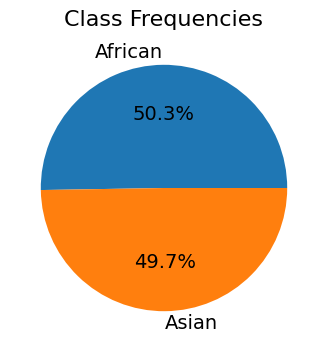

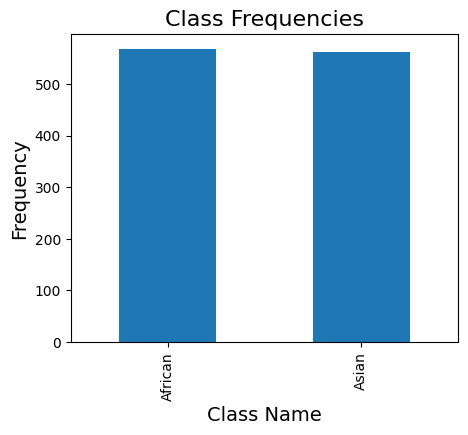

In [13]:
# Create a pie and bar charts of class frequencies
plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Class Frequencies', fontsize=16)
plt.ylabel('')
plt.show()
print()

plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='bar')
plt.title('Class Frequencies', fontsize=16)
plt.xlabel('Class Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

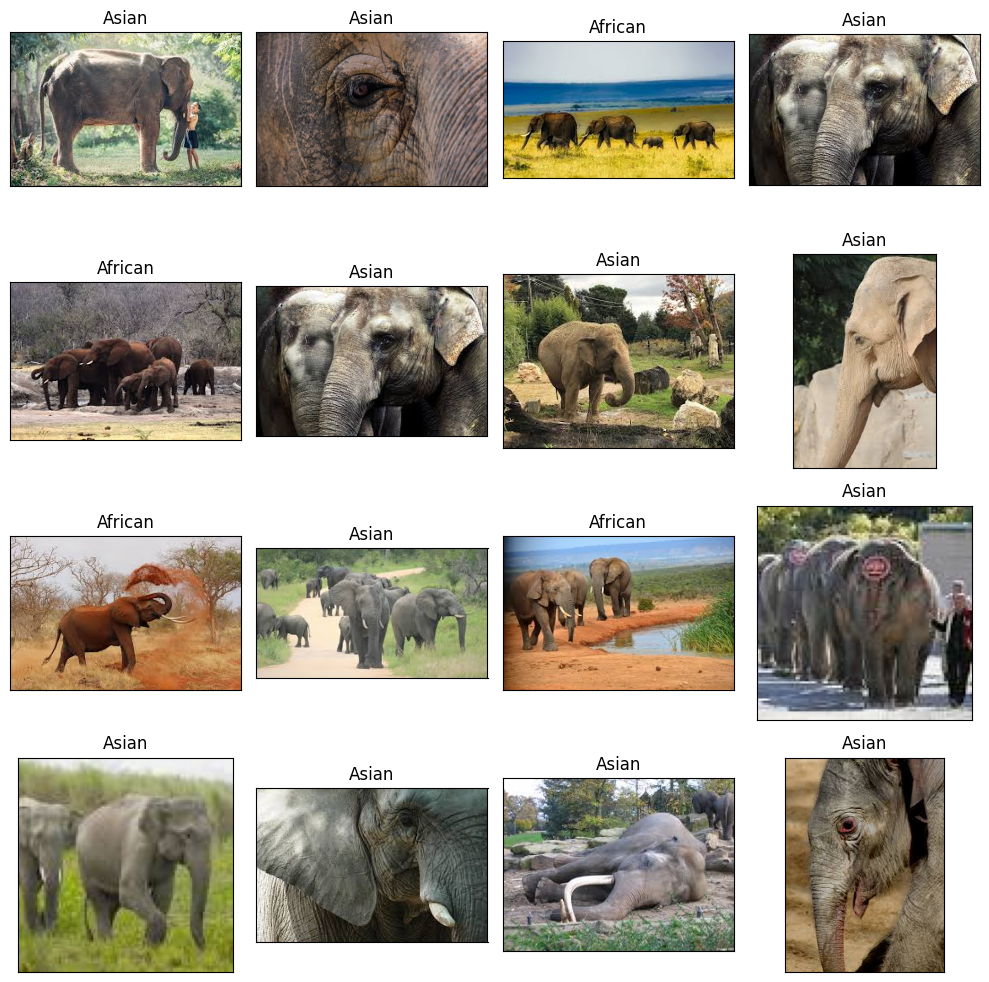

In [14]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.img_path[random_index[i]]))
    ax.set_title(df.class_name[random_index[i]])
plt.tight_layout()
plt.show()

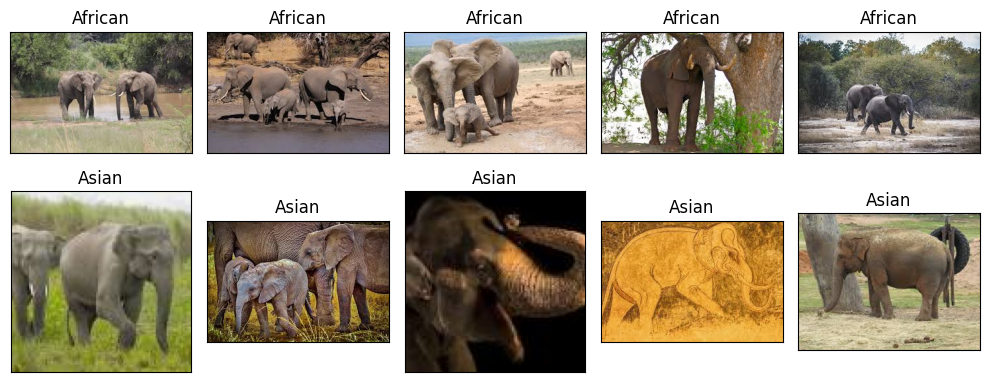

In [15]:
# create a list to store the random indices for each class
indices = []

# iterate over each unique class in the DataFrame
for class_name in df['class_name'].unique():
    class_indices = df[df['class_name'] == class_name].index
    if len(class_indices) >= 5:
        # Select random indices from this class
        random_indices = np.random.choice(class_indices, 5, replace=False)
    else:
        # If the class has less than 5 instances, select all of them
        random_indices = class_indices
    indices.extend(random_indices)

# Plot the selected random images from each class
fig, axes = plt.subplots(nrows=len(indices)//5, ncols=5, figsize=(10, len(indices)//5*2),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.img_path[indices[i]]))
    ax.set_title(df.class_name[indices[i]])
plt.tight_layout()
plt.show()
